In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((60000, 28*28))
x_train = x_train / 255
x_test = x_test.reshape((10000, 28*28))
x_test = x_test / 255

In [3]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [4]:
modelAdam = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])
modelAdam.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 128
n_epoch = 20
history = modelAdam.fit(x_train, y_train, validation_split = 0.1, batch_size=batch_size, epochs=n_epoch)

T = pd.DataFrame(history.history)

Epoch 1/20
422/422 [==============================] - 6s 15ms/step - loss: 0.2151 - accuracy: 0.9377 - val_loss: 0.0678 - val_accuracy: 0.9812
Epoch 2/20
422/422 [==============================] - 7s 16ms/step - loss: 0.0626 - accuracy: 0.9818 - val_loss: 0.0516 - val_accuracy: 0.9847
Epoch 3/20
422/422 [==============================] - 7s 17ms/step - loss: 0.0414 - accuracy: 0.9866 - val_loss: 0.0483 - val_accuracy: 0.9870
Epoch 4/20
422/422 [==============================] - 8s 18ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0397 - val_accuracy: 0.9893
Epoch 5/20
422/422 [==============================] - 7s 17ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.0440 - val_accuracy: 0.9887
Epoch 6/20
422/422 [==============================] - 7s 17ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0476 - val_accuracy: 0.9883
Epoch 7/20
422/422 [==============================] - 7s 17ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0480 - val_accuracy: 0.9887

In [5]:
modelAdagrad = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])
modelAdagrad.compile(optimizer=Adagrad(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 128
n_epoch = 20
history = modelAdagrad.fit(x_train, y_train, validation_split = 0.1, batch_size=batch_size, epochs=n_epoch)

T = T.append(pd.DataFrame(history.history))

Epoch 1/20
422/422 [==============================] - 8s 20ms/step - loss: 1.9381 - accuracy: 0.5176 - val_loss: 1.3243 - val_accuracy: 0.7905
Epoch 2/20
422/422 [==============================] - 9s 21ms/step - loss: 0.9288 - accuracy: 0.8153 - val_loss: 0.5921 - val_accuracy: 0.8825
Epoch 3/20
422/422 [==============================] - 9s 21ms/step - loss: 0.5687 - accuracy: 0.8607 - val_loss: 0.4199 - val_accuracy: 0.9030
Epoch 4/20
422/422 [==============================] - 9s 21ms/step - loss: 0.4600 - accuracy: 0.8800 - val_loss: 0.3537 - val_accuracy: 0.9127
Epoch 5/20
422/422 [==============================] - 9s 21ms/step - loss: 0.4083 - accuracy: 0.8894 - val_loss: 0.3168 - val_accuracy: 0.9183
Epoch 6/20
422/422 [==============================] - 9s 22ms/step - loss: 0.3768 - accuracy: 0.8962 - val_loss: 0.2936 - val_accuracy: 0.9223
Epoch 7/20
422/422 [==============================] - 9s 21ms/step - loss: 0.3548 - accuracy: 0.9007 - val_loss: 0.2765 - val_accuracy: 0.9275

In [6]:
modelRMSprop = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])
modelRMSprop.compile(optimizer=RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 128
n_epoch = 20
history = modelRMSprop.fit(x_train, y_train, validation_split = 0.1, batch_size=batch_size, epochs=n_epoch)

T = T.append(pd.DataFrame(history.history))

Epoch 1/20
422/422 [==============================] - 10s 23ms/step - loss: 0.2100 - accuracy: 0.9349 - val_loss: 0.0630 - val_accuracy: 0.9825
Epoch 2/20
422/422 [==============================] - 10s 24ms/step - loss: 0.0597 - accuracy: 0.9810 - val_loss: 0.0503 - val_accuracy: 0.9868
Epoch 3/20
422/422 [==============================] - 10s 24ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.0476 - val_accuracy: 0.9880
Epoch 4/20
422/422 [==============================] - 9s 22ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0460 - val_accuracy: 0.9887
Epoch 5/20
422/422 [==============================] - 10s 23ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0408 - val_accuracy: 0.9892
Epoch 6/20
422/422 [==============================] - 10s 24ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0462 - val_accuracy: 0.9897
Epoch 7/20
422/422 [==============================] - 10s 24ms/step - loss: 0.0117 - accuracy: 0.9965 - val_loss: 0.0475 - val_accuracy: 

In [7]:
T.to_csv("/Users/benjamintenmann/Desktop/CompBio/Assignments/DL_1/MNIST/hist_cnn.csv")

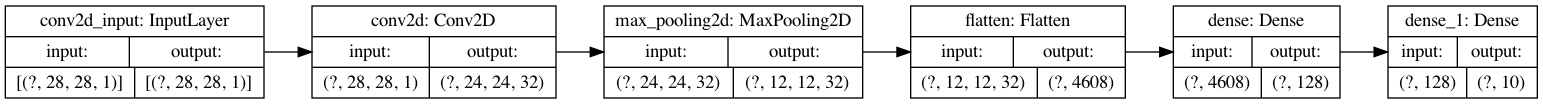

In [8]:
tf.keras.utils.plot_model(modelAdam, to_file='/Users/benjamintenmann/Desktop/CompBio/Assignments/DL_1/MNIST/model_3.1.png', rankdir='LR', show_shapes=True)

In [9]:
yhat = modelAdam.predict(x_test)
def f(yhat):
    if sum(yhat) != 0:
        r = np.where(yhat == 1)[0][0]
        return r
    else:
        pass
ls = list(map(f, np.round(yhat)))
l = []
for i, y in enumerate(np.round(yhat)):
    if sum(y) == 0:
        l.append(i)
def g(x):
    return x != None
f_ls = np.array(list(filter(g, ls)))
npL = np.array(l)
y_test_cut = np.array(y_test[np.in1d(np.arange(0, 10000), npL, invert=True)])
counts = []
for y in np.unique(y_test_cut):
    count = [0]*10
    for yhat in np.unique(f_ls):
        new = f_ls[y_test_cut == y]
        count[yhat] = len(new[new == yhat])
    counts.append(count)

Figure(648x432)


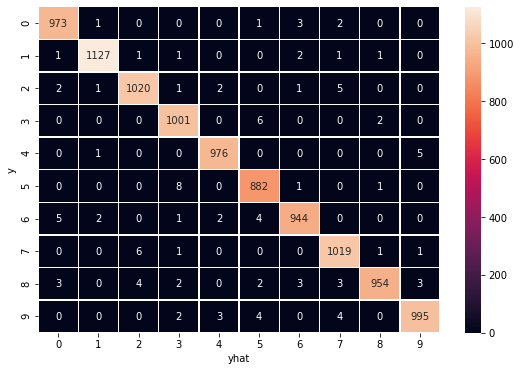

In [10]:
n = np.array(counts)

f, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(n, annot=True, ax=ax, fmt='d', linewidths=.5)
ax.set(xlabel='yhat', ylabel='y')
fig = ax.get_figure()
fig.savefig('/Users/benjamintenmann/Desktop/CompBio/Assignments/DL_1/MNIST/heat_cnn.png', dpi=400)
print(fig)

In [11]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)
loss, acc = modelAdam.evaluate(val_dataset)
print("Adam:", loss, acc)
loss, acc = modelAdagrad.evaluate(val_dataset)
print("Adagrad:", loss, acc)
loss, acc = modelRMSprop.evaluate(val_dataset)
print("RMSprop:", loss, acc)

79/79 [==============================] - 1s 8ms/step - loss: 0.0467 - accuracy: 0.9892
Adam: 0.04673745483160019 0.9891999959945679
79/79 [==============================] - 1s 7ms/step - loss: 0.2186 - accuracy: 0.9387
Adagrad: 0.21859011054039001 0.9387000203132629
79/79 [==============================] - 1s 8ms/step - loss: 0.0725 - accuracy: 0.9892
RMSprop: 0.07246769964694977 0.9891999959945679


In [12]:
len(l)

3

In [13]:
np.sum(np.diagonal(n))

9891

In [14]:
(10000 - 9891) - 3

106

Figure(648x432)


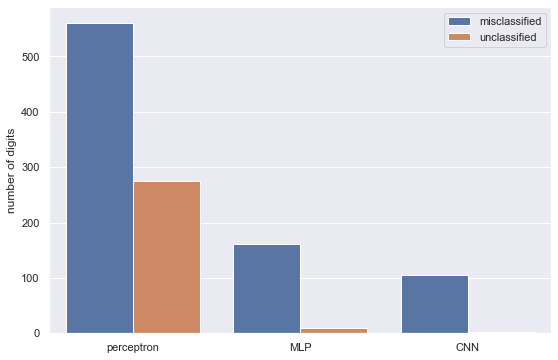

In [18]:
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))

ax = sns.barplot(x=['perceptron', 'perceptron', 'MLP', 'MLP', 'CNN', 'CNN'], y=[561, 275, 162, 9, 106, 3], hue=['misclassified', 'unclassified']*3)
ax.set(ylabel='number of digits')
fig = ax.get_figure()
fig.savefig('/Users/benjamintenmann/Desktop/CompBio/Assignments/DL_1/MNIST/err_barplot.png', dpi=400)
print(fig)